# Análisis Exploratorio de Datos (EDA) - Riesgo Crediticio
**Objetivo:** Visualizar y validar las reglas de negocio aplicadas al Scoring de Crédito.
**Autor:** Eberth Gianfranco Rojas Barbaran

In [1]:
# 1. Configuración Inicial y Carga de Datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración para Jupyter (evita que se trabe)
%matplotlib inline

# Configuración visual
sns.set_style("whitegrid")
plt.rcParams['figure.max_open_warning'] = 50

# Definir rutas
ruta_clean = '../data/processed/german_credit_riesgo_final.csv'

# Cargar datos
try:
    df = pd.read_csv(ruta_clean)
    print(f"Carga Exitosa: {df.shape[0]} registros importados desde 'processed'.")
    print("--- Primeras 3 filas para verificación ---")
    display(df.head(3))
except FileNotFoundError:
    print(f"ERROR CRÍTICO: No se encontró el archivo en {ruta_clean}")
    print("Asegúrate de haber ejecutado el Notebook 01 primero.")

# OPTIMIZACIÓN: Cerrar cualquier figura previa
plt.close('all')

Carga Exitosa: 1000 registros importados desde 'processed'.
--- Primeras 3 filas para verificación ---


,Edad,Genero,Id_Trabajo,Tipo_Vivienda,Cta_Ahorro,Cta_Corriente,Monto_Credito,Plazo_Meses,Propósito,Score,Resultado_Riesgo
0,67,Masculino,Empleado Dependiente,Propia,Sin Cuenta,Poco,1169,6,Electrodomésticos,90,Normal
1,22,Femenino,Empleado Dependiente,Propia,Poco,Moderado,5951,48,Electrodomésticos,80,Deficiente
2,49,Masculino,Operativo/Técnico,Propia,Poco,Sin Cuenta,2096,12,Educación,90,Normal


## 2. Distribución General del Riesgo
En esta sección analizamos:
1. La cantidad total de clientes aprobados vs. rechazados (**Semáforo**).
2. La distribución de los puntajes numéricos para entender qué tan estricto fue el corte (**Histograma**).

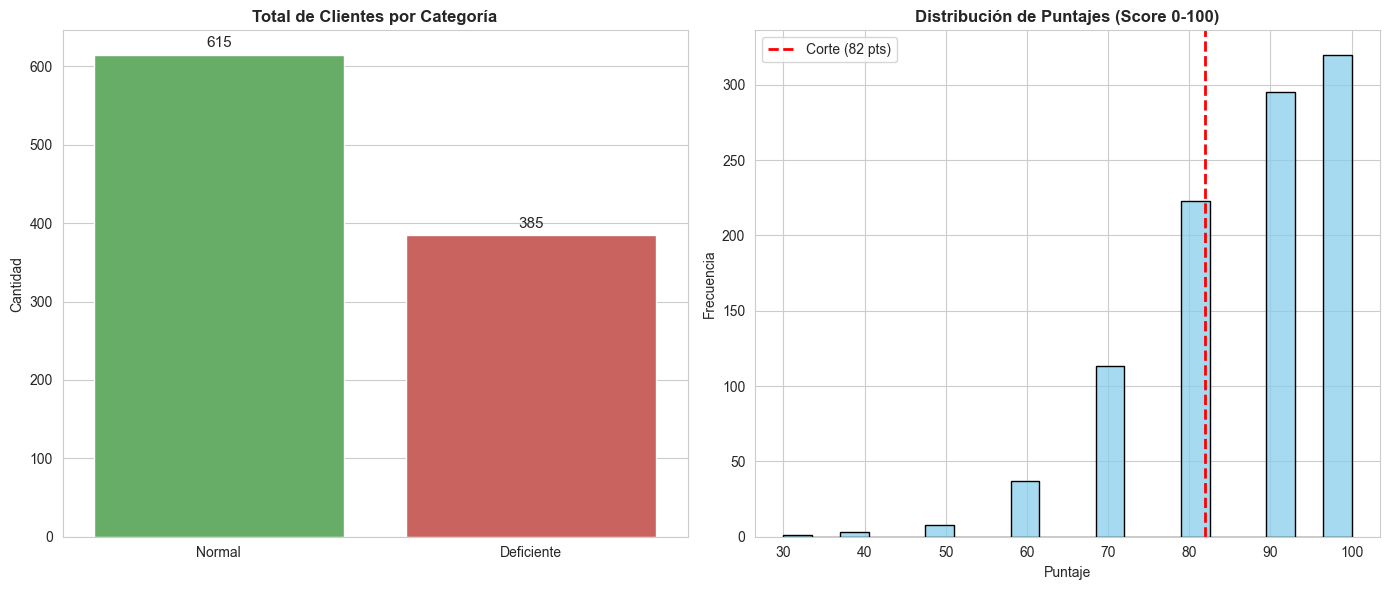

In [2]:
# Configurar lienzo para 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- GRÁFICO A: EL CONTEO (SEMÁFORO) ---
# Usamos colores intuitivos: Rojo para peligro, Verde para aprobado
ax1 = sns.countplot(x='Resultado_Riesgo', hue='Resultado_Riesgo', legend=False, 
                    data=df, palette={'Deficiente': '#D9534F', 'Normal': '#5CB85C'}, ax=axes[0])
axes[0].set_title('Total de Clientes por Categoría', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Cantidad')
# Poner etiquetas de datos (números)
for container in ax1.containers:
    ax1.bar_label(container, fontsize=11, padding=3)

# --- GRÁFICO B: EL PUNTAJE (HISTOGRAMA) ---
# Optimizado: kde=False para mayor velocidad
sns.histplot(df['Score'], bins=20, kde=False, color='skyblue', edgecolor='black', ax=axes[1])
# Línea de corte (82 puntos)
axes[1].axvline(x=82, color='red', linestyle='--', linewidth=2, label='Corte (82 pts)')
axes[1].set_title('Distribución de Puntajes (Score 0-100)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Puntaje')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

plt.tight_layout()
plt.show()

# OPTIMIZACIÓN: Liberar memoria
plt.close(fig)

## 3. Validación de Reglas de Negocio (Hipótesis)
Aquí comprobamos si las penalizaciones aplicadas en el código tuvieron el efecto deseado.
- **Hipótesis 1:** Los trabajos precarios deberían tener menor Score promedio.
- **Hipótesis 2:** Quienes no tienen vivienda propia deberían tener menor Score promedio.

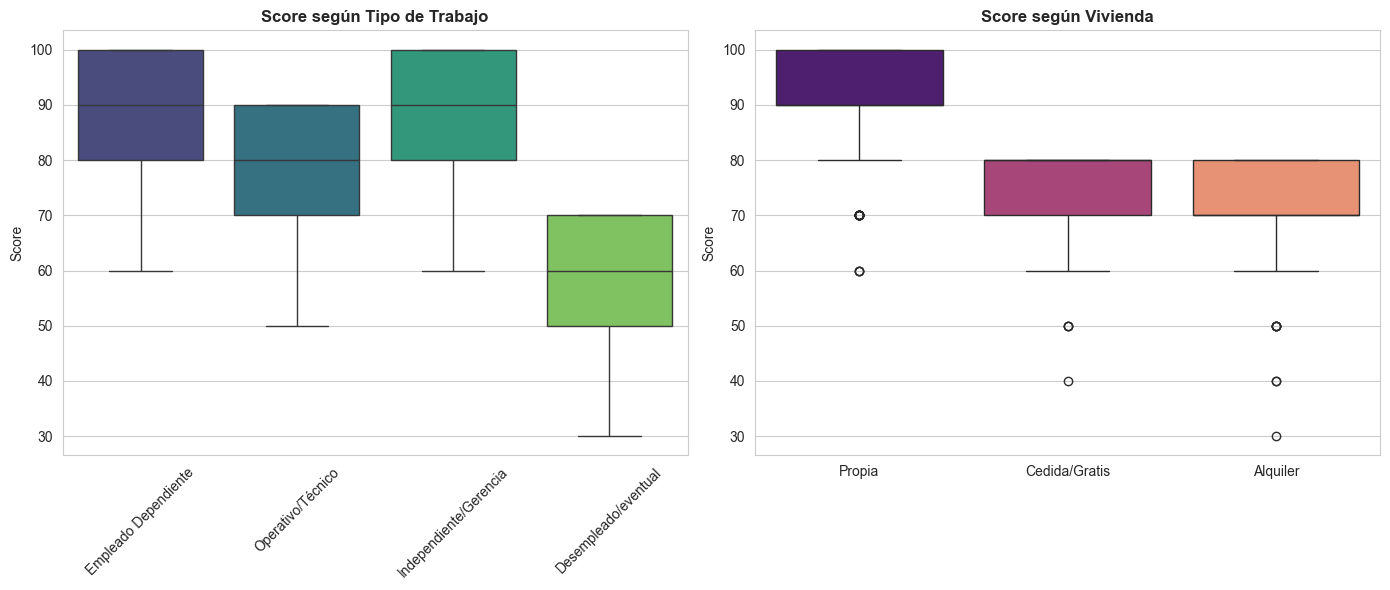

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- HIPÓTESIS 1: IMPACTO DEL TRABAJO ---
# Ordenamos las cajas para que se vea la escalera de "Peor Trabajo" a "Mejor Trabajo"
orden_trabajo = df['Id_Trabajo'].unique() 
sns.boxplot(x='Id_Trabajo', y='Score', data=df, hue='Id_Trabajo', legend=False, 
            palette='viridis', order=orden_trabajo, ax=axes[0])
axes[0].set_title('Score según Tipo de Trabajo', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('')

# --- HIPÓTESIS 2: IMPACTO DE LA VIVIENDA ---
sns.boxplot(x='Tipo_Vivienda', y='Score', data=df, hue='Tipo_Vivienda', 
            legend=False, palette='magma', ax=axes[1])
axes[1].set_title('Score según Vivienda', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

# OPTIMIZACIÓN: Liberar memoria
plt.close(fig)